`Cortix` 2019 **03Aug2019**

# Criminal Justice Dynamics Example
* This is part of the [Cortix](https://cortix.org) Notebook [guides](https://github.com/dpploy/cortix-nb)
([index](https://github.com/dpploy/cortix-nb/blob/master/droplet.ipynb)).
* Select each of the cells below and run them sequentially (use the run button, `>|` on the tool bar or use the `Cell` option on the menu bar).
* Alternatively, on the menu bar run all cells: `Cell -> Run All`.

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\vvar}{\boldsymbol{v}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\Power}{\mathcal{P}}
  \newcommand{\bm}[1]{{\boldsymbol{#1}}}
$

---
## Table of Contents
* [Introduction](#intro)
  - [Prison population model](#prisonmodel)
  - [Parole population model](#parolemodel)
  - [Street population model](#streetmodel)
  - [Jail population model](#jailmodel)
  - [Arrested population model](#arrestedmodel)
* [Write a Cortix run file](#runfile)
* [Verify the network connectivity](#net)
* [Run the network simulation](#run)
* [Results inspection through Cortix](#inspect)
   - [Results: Prison](#prison)
   - [Results: Parole](#parole)
   - [Results: Adjudication](#adjudication)
   - [Results: Jail](#jail)
---

## Introduction<a id="intro"></a>

This Cortix use-case simulates the population dynamics across the network of a criminal justice system.

### Prison node population model<a id="prisonmodel"></a>

The equation for the population balance in the prison node is:

\begin{equation*}
  d_t f_{\text{p}_g}  = I_{\text{p}_g} - O_{\text{p}_g} - D_{\text{p}_g} ,
\end{equation*}

where $f_{\text{p}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{p}_g}(t)$ is the population inflow for group $g$, $O_{\text{p}_g}(t)$ is the outflow, and $D_{\text{p}_g}(t)$ is the death rate term in prison for a given group $g$. The inflow and outflow rates depend on the particular coupling to the prison node. For example, the contribution from the "adjudication" node (awaiting adjudication) to the prison inflow is proposed as follows:

\begin{equation*}
c_\text{a,p}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,p}^{(g)}  ,
\end{equation*}

where $c_\text{a,p}^{(g)}$ is the commitment rate to "prison" from the "adjudication" for the population group $g$ (adjudication "a" to prison "p"), $f_{\text{a}_g}(t)$ is the population in the "adjudication" node, and $\mu_{\text{a}_g}$ is a conviction rate modifier. These group-dependent multiplying coefficients could be time dependent.

Hence a tentative form of inflow reads

\begin{equation*}
I_{\text{p}_g}(t) = c_\text{a,p}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,p}^{(g)} + 
                    c_\text{j,p}^{(g)} \, f_{\text{j}_g}(t) \, \mu_\text{j,p}^{(g)} +
                    c_\text{e,p}^{(g)} \, f_{\text{e}_g}(t) \, \mu_\text{e,p}^{(g)} ,
\end{equation*}

where the last two terms refer to the "jail" node and "parole" nodes respectively.  Note that the inflow is dependent on populations from distinct nodes ($f_{\text{a}_g}$, $f_{\text{j}_g}$ and $f_{\text{e}_g}$).

A tentative form for the outflow is similar but with one key difference

\begin{equation*}
O_{\text{p}_g}(t) = c_\text{p,0}^{(g)} \, f_{\text{p}_g}(t) \, \mu_\text{p,0}^{(g)} +
                    c_\text{p,e}^{(g)} \, f_{\text{p}_g}(t) \, \mu_\text{p,e}^{(g)} ,
\end{equation*}

that is, the rates are dependent on the population in prison. The first coefficient (or time-dependent) quantity is the unconditional rate of outflow associated to the prison population, $c_\text{p,0}^{(g)}$,  and the second coefficient is its modifier $\mu_\text{p,0}^{(g)}$. The second term corresponds to the outflow of the prison population group to the parole node. This is better expressed as

\begin{equation*}
O_{\text{p}_g}(t) = \bigl( c_\text{p,0}^{(g)} \, \mu_\text{p,0}^{(g)} +
                           c_\text{p,e}^{(g)}  \mu_\text{p,e}^{(g)} \big) \, f_{\text{p}_g}(t) .
\end{equation*}

All together the prison population balance gives

\begin{equation*}
d_t f_{\text{p}_g}(t) = 
     \bigl( c_\text{a,p}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,p}^{(g)} +  
            c_\text{j,p}^{(g)} \, f_{\text{j}_g}(t) \, \mu_\text{j,p}^{(g)} +  
            c_\text{e,p}^{(g)} \, f_{\text{e}_g}(t) \, \mu_\text{e,p}^{(g)}  
     \bigr) - 
     \bigl( c_\text{p,0}^{(g)} \, \mu_\text{p,0}^{(g)} + 
            c_\text{p,e}^{(g)} \, \mu_\text{p,e}^{(g)}
     \big) \,f_{\text{p}_g}(t) -
     D_{\text{p}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on populations on external nodes, the second term depends on the prison population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{p}_g}$ term is non-zero which is always the case; no one lives for ever, less so in prison.

### Parole node population model<a id="parolemodel"></a>

The equation for the population balance in the parole node is similar as before:

\begin{equation*}
  d_t f_{\text{e}_g}  = I_{\text{e}_g} - O_{\text{e}_g} - D_{\text{e}_g} ,
\end{equation*}

where $f_{\text{e}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{e}_g}(t)$ is the population inflow for group $g$, $O_{\text{e}_g}(t)$ is the outflow, and $D_{\text{e}_g}(t)$ is the death rate term in parole for a given group $g$. The inflow and outflow rates depend on the particular coupling to the prison node that is,

\begin{equation*}
  I_{\text{e}_g}(t) = c_\text{p,e}^{(g)} \, f_{\text{p}_g}(t) \, \mu_\text{p,e}^{(g)}.
\end{equation*}

Note this term is the outflow term in the prison node model. Likewise the outflow term in the parole node has two contributions and it reads

\begin{equation*}
 O_{\text{e}_g}(t) = \bigl( 
                     c_\text{e,0}^{(g)} \, \mu_\text{e,0}^{(g)} + 
                     c_\text{e,p}^{(g)} \, \mu_\text{e,p}^{(g)} 
                     \bigr)
                     f_{\text{e}_g}(t),
\end{equation*}

the first term being the outflow to freedom and the second is a familiar term from the prison population balance.
Hence overall we have

\begin{equation*}
d_t f_{\text{e}_g}(t) = 
     \bigl( c_\text{p,e}^{(g)} \, f_{\text{p}_g}(t) \, \mu_\text{p,e}^{(g)} \bigr) - 
     \bigl( c_\text{e,0}^{(g)} \, \mu_\text{e,0}^{(g)} + 
            c_\text{e,p}^{(g)} \, \mu_\text{e,p}^{(g)}
     \big) \,f_{\text{e}_g}(t) -
     D_{\text{e}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on populations on external nodes (only the prison), the second term depends on the parole population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{e}_g}$ term is non-zero which is always the case; no one lives for ever.

### Adjudication node population model<a id="streetmodel"></a>

The equation for the population balance in the adjudication node is similar as before also:

\begin{equation*}
  d_t f_{\text{a}_g}  = I_{\text{a}_g} - O_{\text{a}_g} - D_{\text{a}_g} ,
\end{equation*}

where $f_{\text{a}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{a}_g}(t)$ is the population inflow for group $g$, $O_{\text{a}_g}(t)$ is the outflow, and $D_{\text{a}_g}(t)$ is the death rate term in adjudication for a given group $g$. The inflow and outflow rates depend on the particular coupling to the arrested ("r")
node as follows:

\begin{equation*}
  I_{\text{a}_g}(t) = c_\text{r,a}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,a}^{(g)}.
\end{equation*}

Note this term will be the same as the outflow term of the arrested node model to the adjudication node model. Likewise the outflow term in the adjudication node has four contributions and it reads

\begin{equation*}
 O_{\text{a}_g}(t) = \bigl( 
                     c_\text{a,0}^{(g)} \, \mu_\text{a,0}^{(g)} + 
                     c_\text{a,j}^{(g)} \, \mu_\text{a,j}^{(g)} +
                     c_\text{a,b}^{(g)} \, \mu_\text{a,b}^{(g)} +
                     c_\text{a,p}^{(g)} \, \mu_\text{a,p}^{(g)}   
                     \bigr)
                     f_{\text{a}_g}(t),
\end{equation*}

the first term being the outflow to freedom and the other terms associated to the jail, probation, and prison nodes, respectively.
Hence overall we have

\begin{equation*}
d_t f_{\text{a}_g}(t) = 
     \bigl( c_\text{r,a}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,a}^{(g)} \bigr) - 
     \bigl( c_\text{a,0}^{(g)} \, \mu_\text{a,0}^{(g)} + 
            c_\text{a,j}^{(g)} \, \mu_\text{a,j}^{(g)} +
            c_\text{a,b}^{(g)} \, \mu_\text{a,b}^{(g)} +
            c_\text{a,p}^{(g)} \, \mu_\text{a,p}^{(g)}
     \big) \,f_{\text{a}_g}(t) -
     D_{\text{a}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on a population on a external node (only the arrested node), the second term depends on the adjudication population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{a}_g}$ term is non-zero which is always the case.

### Jail node population model<a id="jailmodel"></a>

The equation for the population balance in the jail node is similar as before also:

\begin{equation*}
  d_t f_{\text{j}_g}  = I_{\text{j}_g} - O_{\text{j}_g} - D_{\text{j}_g} ,
\end{equation*}

where $f_{\text{j}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{j}_g}(t)$ is the population inflow for group $g$, $O_{\text{j}_g}(t)$ is the outflow, and $D_{\text{j}_g}(t)$ is the death rate term in jail for a given group $g$. The inflow and outflow rates depend on the particular coupling to the arrested ("r"), probation ("b") and adjudication ("a") nodes as follows:

\begin{equation*}
  I_{\text{j}_g}(t) = c_\text{r,j}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,j}^{(g)} +
                      c_\text{b,j}^{(g)} \, f_{\text{b}_g}(t) \, \mu_\text{b,j}^{(g)} +
                      c_\text{a,j}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,j}^{(g)} .
\end{equation*}

Note this term will be the same as the outflow term of the respective models: arrested, probation and adjudication nodes model to the jail node model. Likewise the outflow term in the jail node has two contributions and it reads

\begin{equation*}
 O_{\text{j}_g}(t) = \bigl( 
                     c_\text{j,0}^{(g)} \, \mu_\text{j,0}^{(g)} + 
                     c_\text{j,p}^{(g)} \, \mu_\text{j,p}^{(g)}   
                     \bigr)
                     f_{\text{j}_g}(t),
\end{equation*}

the first term being the outflow to freedom and the other terms associated to the prison node, respectively.
Hence overall we have

\begin{equation*}
d_t f_{\text{j}_g}(t) = 
     \bigl( c_\text{r,j}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,j}^{(g)} +
            c_\text{b,j}^{(g)} \, f_{\text{b}_g}(t) \, \mu_\text{b,j}^{(g)} +
            c_\text{a,j}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,j}^{(g)}
            \bigr) - 
     \bigl( c_\text{j,0}^{(g)} \, \mu_\text{j,0}^{(g)} + 
            c_\text{j,p}^{(g)} \, \mu_\text{j,p}^{(g)}
     \big) \,f_{\text{j}_g}(t) -
     D_{\text{j}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on a population on a external node (only the arrested node), the second term depends on the adjudication population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{a}_g}$ term is non-zero which is always the case.

### Arrested node population model<a id="arrestedmodel"></a>

The equation for the population balance in the arrested node is similar as before:

\begin{equation*}
  d_t f_{\text{r}_g}  = I_{\text{r}_g} - O_{\text{r}_g} - D_{\text{r}_g} ,
\end{equation*}

where $f_{\text{r}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{r}_g}(t)$ is the population inflow for group $g$, $O_{\text{r}_g}(t)$ is the outflow, and $D_{\text{r}_g}(t)$ is the death rate term while arrested for a given group $g$. The inflow and outflow rates depend on the particular couplings to the probation, jail, adjudication, and freedom nodes that is,

\begin{equation*}
  I_{\text{r}_g}(t) = c_\text{0,r}^{(g)} \, f_{\text{0}_g}(t) \, \mu_\text{0,r}^{(g)}.
\end{equation*}

Note this term is the outflow term in the freedom node model. Likewise the outflow term in the arrested node has four contributions and it reads

\begin{equation*}
 O_{\text{r}_g}(t) = \bigl( 
                     c_\text{r,0}^{(g)} \, \mu_\text{r,0}^{(g)} + 
                     c_\text{r,b}^{(g)} \, \mu_\text{r,b}^{(g)} +
                     c_\text{r,j}^{(g)} \, \mu_\text{r,j}^{(g)} +
                     c_\text{r,a}^{(g)} \, \mu_\text{r,a}^{(g)}
                     \bigr)
                     f_{\text{r}_g}(t),
\end{equation*}

the first term being the outflow to freedom and the second is are by now familiar terms of the population balance.
Hence overall we have

\begin{equation*}
d_t f_{\text{r}_g}(t) = 
     \bigl( c_\text{0,r}^{(g)} \, f_{\text{0}_g}(t) \, \mu_\text{0,r}^{(g)} \bigr) - 
     \bigl( c_\text{r,0}^{(g)} \, \mu_\text{r,0}^{(g)} + 
            c_\text{r,b}^{(g)} \, \mu_\text{r,b}^{(g)} +
            c_\text{r,j}^{(g)} \, \mu_\text{r,j}^{(g)} +
            c_\text{r,a}^{(g)} \, \mu_\text{r,a}^{(g)}
     \big) \,f_{\text{r}_g}(t) -
     D_{\text{r}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on populations on external nodes (only the freedom), the second term depends on the arrested population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{r}_g}$ term is non-zero which is always the case.

### Probation node population model<a id="probationmodel"></a>

The equation for the population balance in the probation node is similar as before:

\begin{equation*}
  d_t f_{\text{b}_g}  = I_{\text{b}_g} - O_{\text{b}_g} - D_{\text{b}_g} ,
\end{equation*}

where $f_{\text{b}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{b}_g}(t)$ is the population inflow for group $g$, $O_{\text{b}_g}(t)$ is the outflow, and $D_{\text{b}_g}(t)$ is the death rate term while in probation for a given group $g$. The inflow and outflow rates depend on the particular couplings to the arrested, jail, adjudication, and freedom nodes that is,

\begin{equation*}
  I_{\text{b}_g}(t) = c_\text{r,b}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,b}^{(g)} +
                      c_\text{a,b}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,b}^{(g)} .
\end{equation*}

Note these terms are the outflow terms in the corresponding nodes model. Likewise the outflow term in the probation node has two contributions and it reads

\begin{equation*}
 O_{\text{b}_g}(t) = \bigl( 
                     c_\text{b,0}^{(g)} \, \mu_\text{b,0}^{(g)} +
                     c_\text{b,j}^{(g)} \, \mu_\text{b,j}^{(g)} 
                     \bigr)
                     f_{\text{b}_g}(t),
\end{equation*}

the first term being the outflow to freedom and the second is the outflow to the jail node.
Hence overall we have

\begin{equation*}
d_t f_{\text{b}_g}(t) = 
     \bigl( c_\text{r,b}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,b}^{(g)} +
            c_\text{a,b}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,b}^{(g)} 
     \bigr) - 
     \bigl( c_\text{b,0}^{(g)} \, \mu_\text{b,0}^{(g)} + 
            c_\text{b,j}^{(g)} \, \mu_\text{b,j}^{(g)} 
     \big) \,f_{\text{b}_g}(t) -
     D_{\text{b}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on populations on external nodes (only the freedom), the second term depends on the arrested population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{r}_g}$ term is non-zero which is always the case.

## Write the run context<a id="runfile"></a>

In [1]:
# Import various packages; must have the Cortix repository installed

import matplotlib.pyplot as plt
import scipy.constants as const
from cortix.src.module import Module
from cortix.src.cortix_main import Cortix
from cortix.examples.prison import Prison
from cortix.examples.parole import Parole
from cortix.examples.adjudication import Adjudication
from cortix.examples.jail import Jail
from cortix.examples.arrested import Arrested

In [2]:
# Setup parameters
end_time  = 100 * const.day
time_step = 0.5 * const.day
n_groups  = 450   # number of population groups

# Create a Cortix object with Python multiprocessing
cortix = Cortix(use_mpi=False)

[98342] 2019-08-04 12:05:39,874 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

In [3]:
# Create the application network

prison = Prison(n_groups=n_groups)
cortix.add_module(prison)
prison.end_time = end_time
prison.time_step = time_step

parole = Parole(n_groups=n_groups)
cortix.add_module(parole)
parole.end_time = end_time
parole.time_step = time_step

adjudication = Adjudication(n_groups=n_groups)
cortix.add_module(adjudication)
adjudication.end_time = end_time
adjudication.time_step = time_step

jail = Jail(n_groups=n_groups)
cortix.add_module(jail)
jail.end_time = end_time
jail.time_step = time_step

arrested = Arrested(n_groups=n_groups)
cortix.add_module(arrested)
arrested.end_time = end_time
arrested.time_step = time_step

prison.connect( 'parole', parole.get_port('prison') )
adjudication.connect( 'prison', prison.get_port('adjudication') )
jail.connect( 'prison', prison.get_port('jail') )
jail.connect( 'adjudication', adjudication.get_port('jail') )
arrested.connect( 'jail', jail.get_port('arrested') )
arrested.connect( 'adjudication', adjudication.get_port('arrested') )

## Verify the network connectivity<a id="net"></a>

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


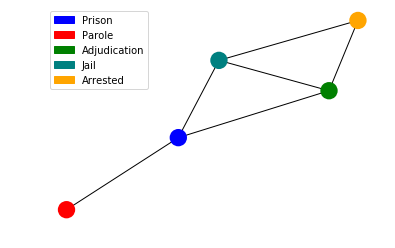

In [4]:
# View the Cortix network created

cortix.draw_network()
plt.show()

## Run network simulation<a id="run"></a>

In [5]:
# Run the simulation!

cortix.run()

[98342] 2019-08-04 12:05:40,109 - cortix - INFO - Launching Module <cortix.examples.prison.Prison object at 0x151e322c50>
[98342] 2019-08-04 12:05:40,116 - cortix - INFO - Launching Module <cortix.examples.parole.Parole object at 0x151e322dd8>
[98342] 2019-08-04 12:05:40,123 - cortix - INFO - Launching Module <cortix.examples.adjudication.Adjudication object at 0x10a302fd0>
[98342] 2019-08-04 12:05:40,131 - cortix - INFO - Launching Module <cortix.examples.jail.Jail object at 0x151e322da0>
[98342] 2019-08-04 12:05:40,138 - cortix - INFO - Launching Module <cortix.examples.arrested.Arrested object at 0x115f4f320>
[98342] 2019-08-04 12:05:42,448 - cortix - INFO - Module <cortix.examples.parole.Parole object at 0x151e322dd8> getting new state
[98342] 2019-08-04 12:05:42,453 - cortix - INFO - Module <cortix.examples.prison.Prison object at 0x151e322c50> getting new state
[98342] 2019-08-04 12:05:42,458 - cortix - INFO - Module <cortix.examples.arrested.Arrested object at 0x115f4f320> getti

## Results inspection through Cortix<a id="inspect"></a>

In [6]:
'''List of modules in Cortix'''

cortix.modules

In [7]:
'''Attach to modules'''

prison=cortix.modules[0]
parole=cortix.modules[1]
adjudication=cortix.modules[2]
jail=cortix.modules[3]
arrested=cortix.modules[4]

In [8]:
total_num_params = 0

### Prison module<a id="prison"></a>

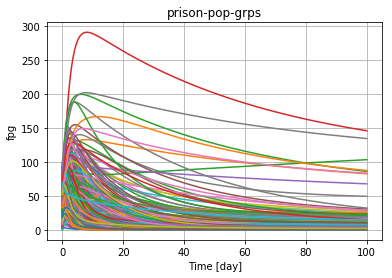

# parameters =  1800


In [9]:
'''Prison Module State'''

population_phase = prison.state
(fpg_quant, time_unit) = population_phase.get_quantity_history('fpg')

fpg_quant.plot( x_scaling=1/const.day, x_label='Time [day]')
plt.grid()
plt.show()

# number of parameters in the prison model
n_params = (len(population_phase.GetActors())-1)*n_groups
print('# parameters = ',n_params)
total_num_params += n_params

### Parole module<a id="parole"></a>

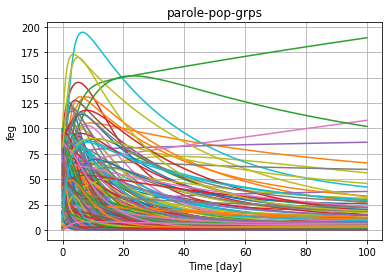

# parameters =  1800


In [10]:
'''Parole Module State'''

population_phase = parole.state
(feg_quant, time_unit) = population_phase.get_quantity_history('feg')

feg_quant.plot( x_scaling=1/const.day, x_label='Time [day]')
plt.grid()
plt.show()

# number of parameters in the parole model
n_params = (len(population_phase.GetActors())-1)*n_groups
print('# parameters = ',n_params)
total_num_params += n_params

### Adjudication module<a id="adjudication"></a>

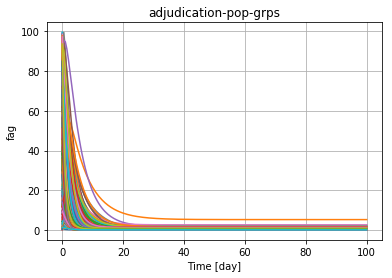

# parameters =  3600


In [11]:
'''Adjudication Module State'''

population_phase = adjudication.state
(fag_quant, time_unit) = population_phase.get_quantity_history('fag')

fag_quant.plot( x_scaling=1/const.day, x_label='Time [day]')
plt.grid()
plt.show()

# number of parameters in the adjudication model
n_params = (len(population_phase.GetActors())-1)*n_groups
print('# parameters = ',n_params)
total_num_params += n_params

### Jail module<a id="jail"></a>

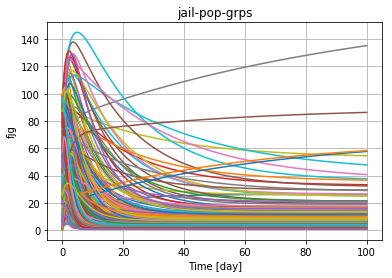

# parameters =  1800


In [12]:
'''Jail Module State'''

population_phase = jail.state
(fjg_quant, time_unit) = population_phase.get_quantity_history('fjg')

fjg_quant.plot( x_scaling=1/const.day, x_label='Time [day]')
plt.grid()
plt.show()

# number of parameters in the jail model
n_params = (len(population_phase.GetActors())-1)*n_groups
print('# parameters = ',n_params)
total_num_params += n_params

### Arrested module<a id="arrested"></a>

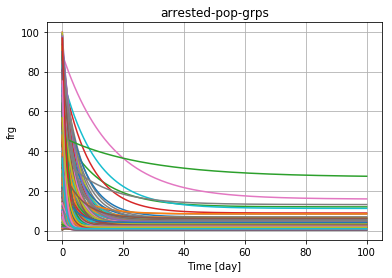

# parameters =  2700


In [13]:
'''Arrested Module State'''

population_phase = arrested.state
(frg_quant, time_unit) = population_phase.get_quantity_history('frg')

frg_quant.plot( x_scaling=1/const.day, x_label='Time [day]')
plt.grid()
plt.show()

# number of parameters in the arrested model
n_params = (len(population_phase.GetActors())-1)*n_groups
print('# parameters = ',n_params)
total_num_params += n_params

In [14]:
'''Total number of parameters'''
total_num_params

11700